In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import keras

from tensorflow.keras import layers
from tensorflow.keras import losses

import matplotlib.pyplot as plt

2024-06-05 21:18:45.982870: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import mydata as md

data = md.Data('cache')


In [47]:
def custom_standardization(input_data):
  s = tf.strings.lower(input_data)
  s =  tf.strings.regex_replace(s, r'http\S+', ' ')
  s =  tf.strings.regex_replace(s, r'@\S+', ' ')
  s =  tf.strings.regex_replace(s, '[%s]' % re.escape(string.punctuation),' ')
  s =  tf.strings.regex_replace(s, r'\s+', ' ')
    
  return s

In [48]:
raw_train_ds, raw_valid_ds, raw_test_ds = data.load('twitter')

In [46]:
for el in raw_train_ds.take(20):
    print(str(el[0].numpy(), 'utf-8'), str(custom_standardization(el[0]).numpy(), 'utf-8'))

@GO__TO_HELL_ что не твит в лента, так тэг(((
  что не твит в лента так тэг 
@Venskovich нет:( сам когда то у кто то отдалживать
  нет сам когда то у кто то отдалживать 
волк, во сколько ты вставать? мочь ~ в 8.30 позвонить, убеждаться что я просыпаться? я не услышать будильник :( @seerzhik
 волк во сколько ты вставать мочь в 8 30 позвонить убеждаться что я просыпаться я не услышать будильник 
@DshVl ниит!ты распотрошить лошадь по имя лошадь((
  ниит ты распотрошить лошадь по имя лошадь 
наш любимый тема в художок я вы так любить:3,хоть где-то поражать от душа можно:D
 наш любимый тема в художок я вы так любить 3 хоть где то поражать от душа можно d 
из германия в калининград и потом поезд в москва на казанский вокзал, очень "логично" :( @nnikiforov @ruspostofficial @postofrussia
 из германия в калининград и потом поезд в москва на казанский вокзал очень логично 
@Polina_Abat я за два день весь серия пересматривать, я нечего заниматься(((
  я за два день весь серия пересматривать я неч

In [49]:
max_features = 20000
sequence_length = 100

vectorize_layer = keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    ngrams=2,
    output_sequence_length=sequence_length
)

In [50]:
vectorize_layer.adapt(raw_train_ds.map(lambda x,y: x))

In [51]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'я',
 'не',
 'и',
 'в',
 'что',
 'на',
 'rt',
 'а',
 'быть',
 'с',
 'ты',
 'как',
 'то',
 'у',
 'это',
 'все',
 'так',
 'd',
 'но',
 'он',
 'ну',
 'мы',
 'по',
 'мой',
 'за',
 'хотеть',
 'весь',
 'такой',
 'еще',
 'день',
 'уже',
 'этот',
 'вот',
 'у я',
 'же',
 'да',
 'она',
 'только',
 'кто',
 'сегодня',
 'о',
 'мочь',
 'они',
 'бы',
 'нет',
 'когда',
 'вы',
 'очень',
 'я не',
 'к',
 'из',
 'знать',
 'просто',
 'год',
 'один',
 'какой',
 'а я',
 'человек',
 'от',
 'любить',
 'если',
 'теперь',
 'свой',
 'надо',
 '3',
 'даже',
 'тоже',
 'завтра',
 'до',
 'новый',
 'там',
 'хороший',
 '—',
 'вообще',
 'хорошо',
 'себя',
 'делать',
 'тот',
 'для',
 'самый',
 'спасибо',
 'понимать',
 'сейчас',
 'не мочь',
 'раз',
 'блин',
 'много',
 'спать',
 'почему',
 'думать',
 'сказать',
 'что я',
 'утро',
 'время',
 'который',
 'смотреть',
 'идти',
 'говорить',
 'пойти',
 '2',
 'без',
 'тут',
 'или',
 'сидеть',
 'давать',
 'писать',
 'и не',
 'друг',
 'не знать',
 'сделать',
 'жизнь'

In [52]:
train_ds = data.vectorize(raw_train_ds, vectorize_layer)
valid_ds = data.vectorize(raw_valid_ds, vectorize_layer)
test_ds = data.vectorize(raw_test_ds, vectorize_layer)


In [53]:
embedding_dim=256

model_lstm = tf.keras.Sequential([
    keras.Input(shape=(None,), dtype="int64"),
    tf.keras.layers.Embedding(
        input_dim=(max_features),
        output_dim=embedding_dim,
        mask_zero=True
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.summary()

model_lstm.compile(loss=losses.BinaryCrossentropy(from_logits=False),
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, None, 256)      │     5,120,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, None, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,128,257 (19.56 MB)

 Trainable params: 5,128,257 (19.56 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
train_ds_batch=train_ds.batch(64)
valid_ds_batch=valid_ds.batch(64)
test_ds_batch=test_ds.batch(64)


In [59]:
checkpoint_filepath = "models/checkpoint_twitter_model_base.weights.h5"

epochs = 10
history = model_lstm.fit(
    train_ds_batch,
    validation_data=valid_ds_batch,
    epochs=epochs,
    callbacks = [
        keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            monitor='val_accuracy',
            mode='max',
            save_weights_only=True,
            save_best_only=True
        )        
    ]
)

Epoch 1/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 186s 66ms/step - accuracy: 0.7871 - loss: 0.4514 - val_accuracy: 0.7920 - val_loss: 0.4442
Epoch 2/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 212s 75ms/step - accuracy: 0.7920 - loss: 0.4428 - val_accuracy: 0.7979 - val_loss: 0.4345
Epoch 3/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 345s 122ms/step - accuracy: 0.7952 - loss: 0.4367 - val_accuracy: 0.8019 - val_loss: 0.4285
Epoch 4/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 272s 96ms/step - accuracy: 0.7997 - loss: 0.4314 - val_accuracy: 0.8011 - val_loss: 0.4274
Epoch 5/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 338s 119ms/step - accuracy: 0.8029 - loss: 0.4276 - val_accuracy: 0.8050 - val_loss: 0.4236
Epoch 6/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 374s 132ms/step - accuracy: 0.8054 - loss: 0.4237 - val_accuracy: 0.7987 - val_loss: 0.4287
Epoch 7/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 343s 121ms/step - accuracy: 0.8067 - loss: 0.4211 - val_accuracy: 0.8062 - val_loss: 0.4199
Epoch 8/10
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 467s 164ms/step - accur

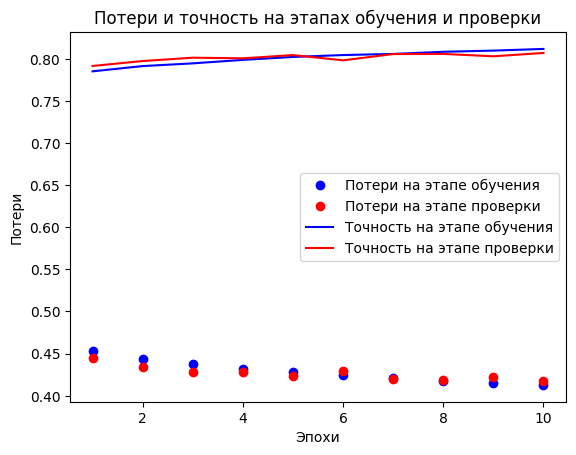

In [60]:
data.plot(history)

In [61]:
model_lstm.load_weights(checkpoint_filepath)

In [62]:
model_lstm.evaluate(test_ds_batch)

355/355 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.8104 - loss: 0.4166


[0.4163948595523834, 0.8075295090675354]

In [65]:
export_model_lstm = tf.keras.Sequential([
  vectorize_layer,
  model_lstm,
  tf.keras.layers.Activation('softmax')
])

export_model_lstm.compile(
    loss=losses.CategoricalCrossentropy(from_logits=False), optimizer="rmsprop", metrics=['accuracy', 'F1Score']
)

export_model_lstm.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_4            │ ?                      │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ ?                      │     5,128,257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,128,257 (19.56 MB)

 Trainable params: 5,128,257 (19.56 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
export_model_lstm.save('models/twitter_export_model_base.keras')